In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

In [2]:
%matplotlib inline

In [3]:
df=pd.read_csv('Air_Traffic_Passenger_Statistics.csv',index_col='index')


##### Replacing spaces in names with underscore

In [4]:
df.rename(columns=lambda name:name.replace(' ','_'),inplace=True)

In [5]:
df.shape

(15007, 16)

In [6]:
df.columns

Index(['Activity_Period', 'Operating_Airline', 'Operating_Airline_IATA_Code',
       'Published_Airline', 'Published_Airline_IATA_Code', 'GEO_Summary',
       'GEO_Region', 'Activity_Type_Code', 'Price_Category_Code', 'Terminal',
       'Boarding_Area', 'Passenger_Count', 'Adjusted_Activity_Type_Code',
       'Adjusted_Passenger_Count', 'Year', 'Month'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15007 entries, 0 to 15006
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity_Period              15007 non-null  int64 
 1   Operating_Airline            15007 non-null  object
 2   Operating_Airline_IATA_Code  14953 non-null  object
 3   Published_Airline            15007 non-null  object
 4   Published_Airline_IATA_Code  14953 non-null  object
 5   GEO_Summary                  15007 non-null  object
 6   GEO_Region                   15007 non-null  object
 7   Activity_Type_Code           15007 non-null  object
 8   Price_Category_Code          15007 non-null  object
 9   Terminal                     15007 non-null  object
 10  Boarding_Area                15007 non-null  object
 11  Passenger_Count              15007 non-null  int64 
 12  Adjusted_Activity_Type_Code  15007 non-null  object
 13  Adjusted_Passenger_Count     15007 n

In [8]:
df.describe()

Activity_Period  Passenger_Count  Adjusted_Passenger_Count  \
count     15007.000000     15007.000000              15007.000000   
mean     201045.073366     29240.521090              29331.917105   
std         313.336196     58319.509284              58284.182219   
min      200507.000000         1.000000                  1.000000   
25%      200803.000000      5373.500000               5495.500000   
50%      201011.000000      9210.000000               9354.000000   
75%      201308.000000     21158.500000              21182.000000   
max      201603.000000    659837.000000             659837.000000   

               Year  
count  15007.000000  
mean    2010.385220  
std        3.137589  
min     2005.000000  
25%     2008.000000  
50%     2010.000000  
75%     2013.000000  
max     2016.000000

In [9]:
df.corr(numeric_only=True)

Activity_Period  Passenger_Count  \
Activity_Period                  1.000000         0.060311   
Passenger_Count                  0.060311         1.000000   
Adjusted_Passenger_Count         0.059336         0.999941   
Year                             0.999940         0.060069   

                          Adjusted_Passenger_Count      Year  
Activity_Period                           0.059336  0.999940  
Passenger_Count                           0.999941  0.060069  
Adjusted_Passenger_Count                  1.000000  0.059096  
Year                                      0.059096  1.000000

In [10]:
df.describe(include='object')

Operating_Airline Operating_Airline_IATA_Code  \
count                              15007                       14953   
unique                                77                          73   
top     United Airlines - Pre 07/01/2013                          UA   
freq                                2154                        3046   

                       Published_Airline Published_Airline_IATA_Code  \
count                              15007                       14953   
unique                                68                          64   
top     United Airlines - Pre 07/01/2013                          UA   
freq                                2645                        3752   

          GEO_Summary GEO_Region Activity_Type_Code Price_Category_Code  \
count           15007      15007              15007               15007   
unique              2          9                  3                   2   
top     International         US           Deplaned               Other   
freq             9210       5797               7071               13087   

             Terminal Boarding_Area Adjusted_Activity_Type_Code   Month  
count           15007         15007                       15007   15007  
unique              5             8                           3      12  
top     International             A                    Deplaned  August  
freq             9197          5225                        7071    1310

In [11]:
duplicate_entries=df.duplicated()
duplicate_entries.value_counts()

False    15007
Name: count, dtype: int64

In [12]:
df['Activity_Period']=pd.to_datetime(df['Activity_Period'],format='%Y%m').dt.strftime('%Y-%m')

In [13]:
df['Activity_Type_Code'].compare(df['Adjusted_Activity_Type_Code']).value_counts()

self            other             
Thru / Transit  Thru / Transit * 2    920
Name: count, dtype: int64

In [14]:
df['Operating_Airline'].compare(df['Published_Airline'])

self              other
index                                                
25         American Eagle Airlines  American Airlines
26         American Eagle Airlines  American Airlines
29     Atlantic Southeast Airlines    Delta Air Lines
30     Atlantic Southeast Airlines    Delta Air Lines
47                    Horizon Air     Alaska Airlines
...                            ...                ...
14958             SkyWest Airlines    United Airlines
14959             SkyWest Airlines    United Airlines
14960             SkyWest Airlines    United Airlines
14961             SkyWest Airlines    United Airlines
14962             SkyWest Airlines    United Airlines

[1602 rows x 2 columns]

In [15]:
df['Passenger_Count'].compare(df['Adjusted_Passenger_Count']).value_counts()

self     other  
10.0     20.0       9
2.0      4.0        6
1.0      2.0        5
110.0    220.0      5
7.0      14.0       5
                   ..
522.0    1044.0     1
518.0    1036.0     1
516.0    1032.0     1
514.0    1028.0     1
15589.0  31178.0    1
Name: count, Length: 693, dtype: int64

In [16]:
df['Operating_Airline_IATA_Code'].compare(df['Published_Airline_IATA_Code'])

self other
index           
25      MQ    AA
26      MQ    AA
29      EV    DL
30      EV    DL
47      QX    AS
...    ...   ...
14958   OO    UA
14959   OO    UA
14960   OO    UA
14961   OO    UA
14962   OO    UA

[1602 rows x 2 columns]

In [17]:
aviation_analysis_profile=ProfileReport(df,dark_mode=True,explorative=True)

In [18]:
# aviation_analysis_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
categorical_palette=sns.color_palette('Set2',n_colors=10)
sequential_palette=sns.cubehelix_palette(start=.2,rot=0.2,as_cmap=True)

Text(0.5, 0, 'Flight Type')

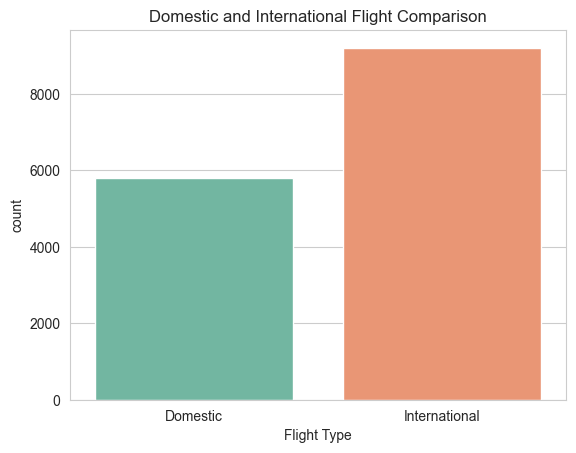

In [20]:
sns.set_style('whitegrid')
plt.title('Domestic and International Flight Comparison')
sns.countplot(x='GEO_Summary',hue='GEO_Summary',data=df,palette=categorical_palette[:2])
plt.xlabel('Flight Type')

Text(0.5, 0, 'Flight Fare')

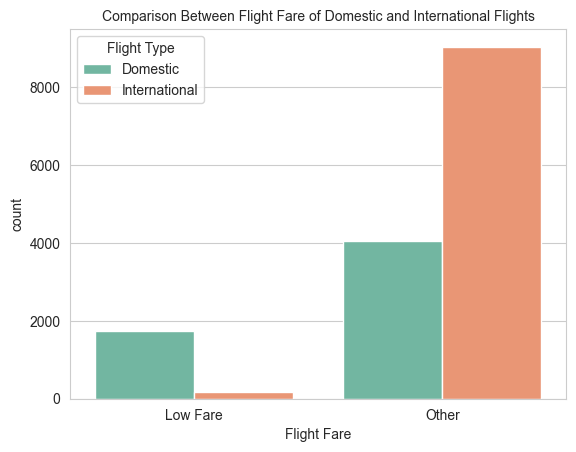

In [21]:
plt.title('Comparison Between Flight Fare of Domestic and International Flights',fontsize=10)
sns.countplot(x='Price_Category_Code',hue='GEO_Summary',data=df,palette=categorical_palette[:2])
plt.legend(title='Flight Type')
plt.xlabel('Flight Fare')

In [22]:
lowfare_nondomestic_flights=df.query("Price_Category_Code == 'Low Fare' and GEO_Region != 'US'")

matplotlib.axes._axes.Axes

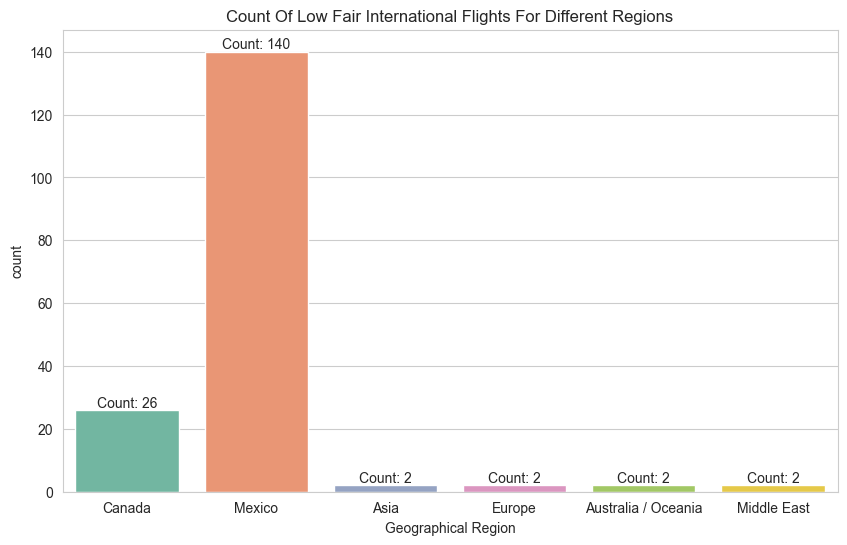

In [23]:
plt.figure(figsize=(10,6))
plt.title('Count Of Low Fair International Flights For Different Regions')
bars=sns.countplot(data=lowfare_nondomestic_flights,x='GEO_Region',hue='GEO_Region',palette=categorical_palette[:6])
for container in bars.containers:
    plt.bar_label(container,fmt='Count: %.0f', label_type='edge')
plt.xlabel('Geographical Region')
type(bars)

In [24]:
# flight_counts_across_years=df.pivot_table(index='Activity_Period',values='Boarding_Area',fill_value=0,aggfunc='count').rename(columns={'Boarding_Area':'Flight_Count'})
flight_counts_across_years=df.pivot_table(index='Year',values='Boarding_Area',fill_value=0,aggfunc='count').rename(columns={'Boarding_Area':'Flight_Count'})

In [25]:
df.columns

Index(['Activity_Period', 'Operating_Airline', 'Operating_Airline_IATA_Code',
       'Published_Airline', 'Published_Airline_IATA_Code', 'GEO_Summary',
       'GEO_Region', 'Activity_Type_Code', 'Price_Category_Code', 'Terminal',
       'Boarding_Area', 'Passenger_Count', 'Adjusted_Activity_Type_Code',
       'Adjusted_Passenger_Count', 'Year', 'Month'],
      dtype='object')

Text(0, 0.5, 'Flights Count')

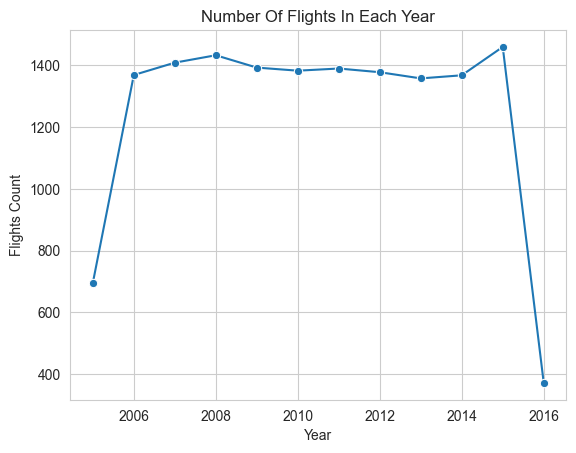

In [26]:
plt.title('Number Of Flights In Each Year')
sns.lineplot(data=flight_counts_across_years,x='Year',y='Flight_Count',marker='o')
plt.ylabel('Flights Count')

In [27]:
top_five_lowfare_airline=df.query("Price_Category_Code == 'Low Fare'").pivot_table(index='Operating_Airline',values='Boarding_Area',aggfunc='count').rename(columns={'Boarding_Area':'Flight_Count'}).nlargest(columns='Flight_Count',n=5)

Text(0.5, 0, 'Number of Low Fare Flights')

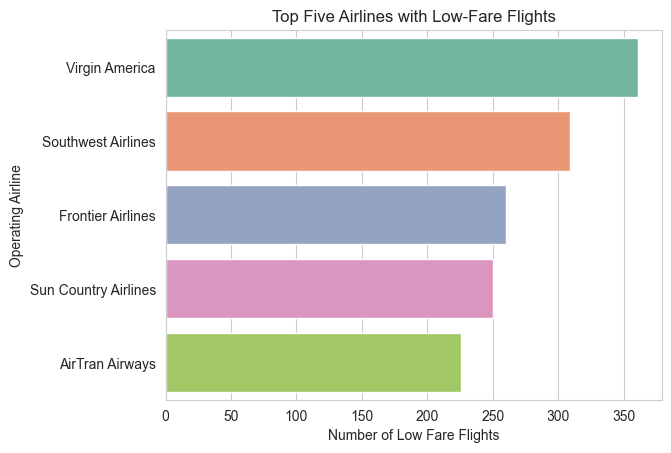

In [28]:
plt.title('Top Five Airlines with Low-Fare Flights')
sns.barplot(data=top_five_lowfare_airline,y='Operating_Airline',x='Flight_Count',hue='Operating_Airline',palette=categorical_palette[:5])
plt.ylabel('Operating Airline')
plt.xlabel('Number of Low Fare Flights')

In [29]:
# passenger_count_over_years=df.pivot_table(index='Year',values='Passenger_Count',fill_value=0,aggfunc='sum')
# df.groupby(pd.Grouper(key='Activity_Period',freq='3ME')).sum()
temp_df=df.copy(deep=True)
temp_df['Activity_Period']=pd.to_datetime(df['Activity_Period'],format='%Y-%m')
print(df.groupby('Activity_Period').agg(func={'Passenger_Count':'sum'}))
temp_df.groupby(pd.Grouper(key='Activity_Period',freq='3MS')).agg(func={'Passenger_Count':'sum'})


                 Passenger_Count
Activity_Period                 
2005-07                  3225769
2005-08                  3195866
2005-09                  2740553
2005-10                  2770715
2005-11                  2617333
...                          ...
2015-11                  4013814
2015-12                  4129052
2016-01                  3748529
2016-02                  3543639
2016-03                  4137679

[129 rows x 1 columns]


Passenger_Count
Activity_Period                 
2005-07-01               9162188
2005-10-01               8059845
2006-01-01               7380691
2006-04-01               8673689
2006-07-01               9091544
2006-10-01               8187046
2007-01-01               7632505
2007-04-01               9189802
2007-07-01               9776329
2007-10-01               8955446
2008-01-01               8393116
2008-04-01               9788726
2008-07-01              10220963
2008-10-01               8831873
2009-01-01               7930257
2009-04-01               9621668
2009-07-01              10491896
2009-10-01               9295121
2010-01-01               8406785
2010-04-01              10132300
2010-07-01              10894031
2010-10-01               9820883
2011-01-01               8623682
2011-04-01              10514654
2011-07-01              11418443
2011-10-01              10371007
2012-01-01               9682159
2012-04-01              11490772
2012-07-01              12460038
2012-10-01              10766916
2013-01-01               9764478
2013-04-01              11683917
2013-07-01              12304713
2013-10-01              11192652
2014-01-01              10276534
2014-04-01              12350822
2014-07-01              12943211
2014-10-01              11544064
2015-01-01              10799749
2015-04-01              12941328
2015-07-01              13799195
2015-10-01              12517615
2016-01-01              11429847

Text(0, 0.5, 'Passenger Count')

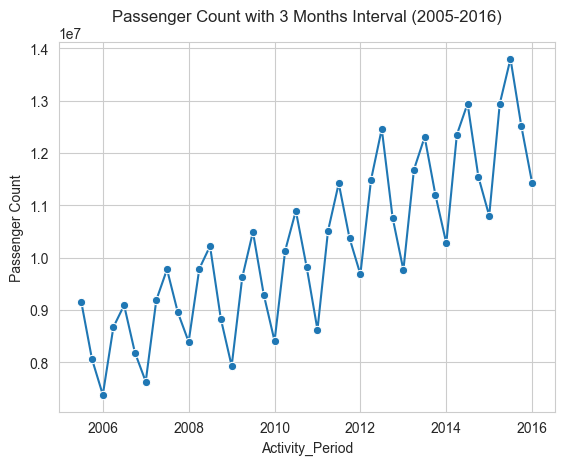

In [30]:
plt.title('Passenger Count with 3 Months Interval (2005-2016)',pad=15)
sns.lineplot(data=temp_df.groupby(pd.Grouper(key='Activity_Period',freq='3MS')).agg(func={'Passenger_Count':'sum'}),x='Activity_Period',y='Passenger_Count',marker='o')
plt.ylabel('Passenger Count')

In [31]:
df['Collaborated']=(df['Operating_Airline_IATA_Code']==df['Published_Airline_IATA_Code'])

In [32]:
df['Collaborated']=df['Collaborated'].map({True:'No',False:'Yes'})

In [33]:
df

Activity_Period Operating_Airline Operating_Airline_IATA_Code  \
df_index                                                                 
0                2005-07      ATA Airlines                          TZ   
1                2005-07      ATA Airlines                          TZ   
2                2005-07      ATA Airlines                          TZ   
3                2005-07       Air Canada                           AC   
4                2005-07       Air Canada                           AC   
...                  ...               ...                         ...   
15002            2016-03    Virgin America                          VX   
15003            2016-03    Virgin America                          VX   
15004            2016-03    Virgin America                          VX   
15005            2016-03   Virgin Atlantic                          VS   
15006            2016-03   Virgin Atlantic                          VS   

         Published_Airline Published_Airline_IATA_Code    GEO_Summary  \
df_index                                                                
0             ATA Airlines                          TZ       Domestic   
1             ATA Airlines                          TZ       Domestic   
2             ATA Airlines                          TZ       Domestic   
3              Air Canada                           AC  International   
4              Air Canada                           AC  International   
...                    ...                         ...            ...   
15002       Virgin America                          VX       Domestic   
15003       Virgin America                          VX  International   
15004       Virgin America                          VX  International   
15005      Virgin Atlantic                          VS  International   
15006      Virgin Atlantic                          VS  International   

         GEO_Region Activity_Type_Code Price_Category_Code       Terminal  \
df_index                                                                    
0                US           Deplaned            Low Fare     Terminal 1   
1                US           Enplaned            Low Fare     Terminal 1   
2                US     Thru / Transit            Low Fare     Terminal 1   
3            Canada           Deplaned               Other     Terminal 1   
4            Canada           Enplaned               Other     Terminal 1   
...             ...                ...                 ...            ...   
15002            US           Enplaned            Low Fare     Terminal 2   
15003        Mexico           Deplaned            Low Fare  International   
15004        Mexico           Enplaned            Low Fare     Terminal 2   
15005        Europe           Deplaned               Other  International   
15006        Europe           Enplaned               Other  International   

         Boarding_Area  Passenger_Count Adjusted_Activity_Type_Code  \
df_index                                                              
0                    B            27271                    Deplaned   
1                    B            29131                    Enplaned   
2                    B             5415          Thru / Transit * 2   
3                    B            35156                    Deplaned   
4                    B            34090                    Enplaned   
...                ...              ...                         ...   
15002                D           194636                    Enplaned   
15003                A             4189                    Deplaned   
15004                D             4693                    Enplaned   
15005                A            12313                    Deplaned   
15006                A            10898                    Enplaned   

          Adjusted_Passenger_Count  Year  Month Collaborated  
df_index                                                      
0                            27271  2005   J

Text(0.5, 0, 'Passengers Count')

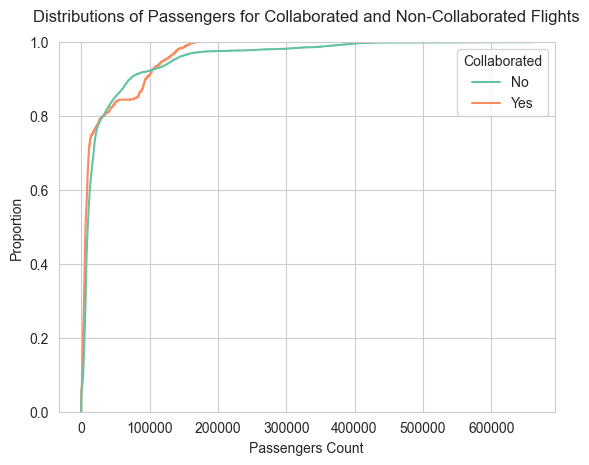

In [34]:
# Collaborated < Non-Collaborated Change this Graphs
plt.title('Distributions of Passengers for Collaborated and Non-Collaborated Flights',pad=15)
sns.ecdfplot(data=df,hue='Collaborated',x='Passenger_Count',palette=categorical_palette[:2])
plt.xlabel('Passengers Count')

Text(0.5, 0, 'Flight Fare')

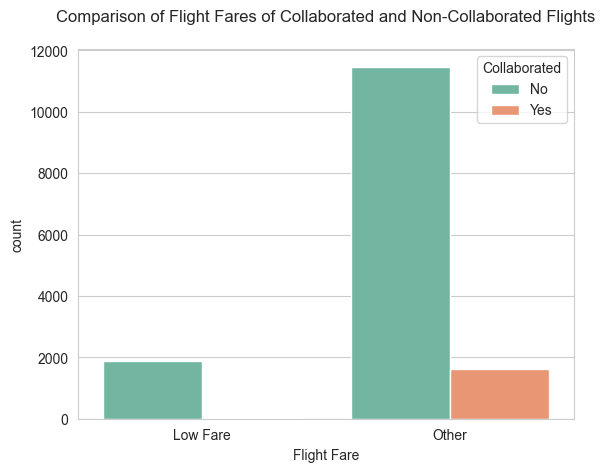

In [35]:
plt.title('Comparison of Flight Fares of Collaborated and Non-Collaborated Flights',pad=20)
sns.countplot(data=df,hue='Collaborated',x='Price_Category_Code',palette=categorical_palette[:2])
plt.xlabel('Flight Fare')

Text(0.5, 0, 'Flight Activity Type')

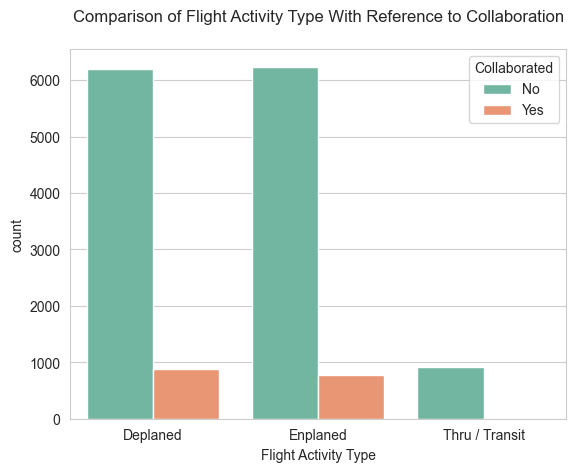

In [36]:
plt.title('Comparison of Flight Activity Type With Reference to Collaboration',pad=20)
sns.countplot(data=df,hue='Collaborated',x='Activity_Type_Code',palette=categorical_palette[:2])
plt.xlabel('Flight Activity Type')

Text(0.5, 0, 'Flight Fare')

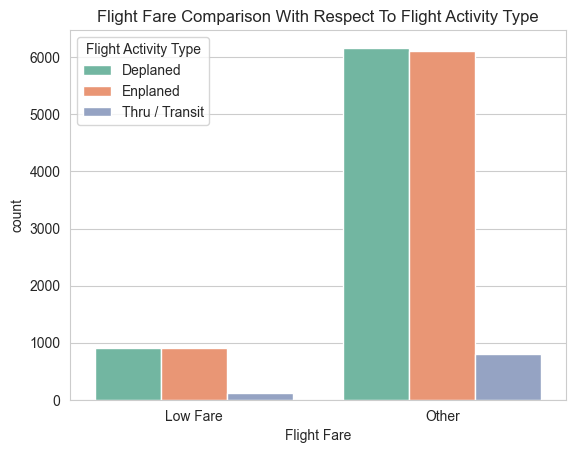

In [37]:
plt.title('Flight Fare Comparison With Respect To Flight Activity Type')
sns.countplot(data=df,hue='Activity_Type_Code',x='Price_Category_Code',palette=categorical_palette[:3])
plt.legend(title='Flight Activity Type')
plt.xlabel('Flight Fare')

In [38]:
avg_passgr_monthly=df.groupby(by=['Month']).agg({'Passenger_Count':'mean'})

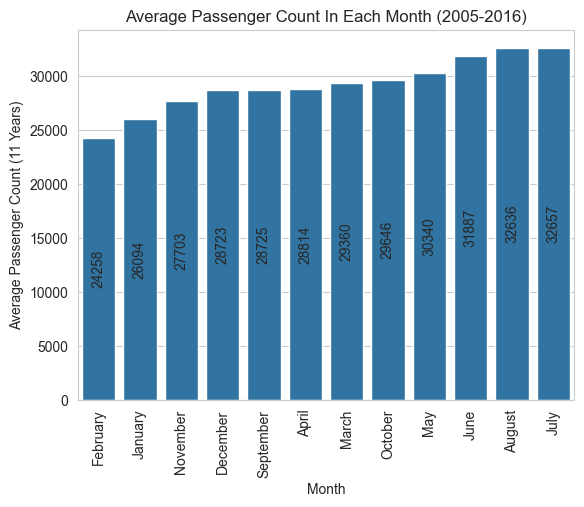

[<BarContainer object of 12 artists>]

In [39]:
plt.title('Average Passenger Count In Each Month (2005-2016)')
bars=sns.barplot(y='Passenger_Count',x='Month',data=avg_passgr_monthly.sort_values(by=['Passenger_Count']))
plt.bar_label(bars.containers[-1],fmt='%.0f', label_type='center',rotation=90)
plt.xticks(rotation=90)
plt.ylabel('Average Passenger Count (11 Years)')
# plt.ylim(top=41000)
plt.show()
bars.containers

In [40]:
df.groupby(by=['Year','Month']).agg({'Passenger_Count':'mean'})

Passenger_Count
Year Month                     
2005 August        27083.610169
     December      23855.330357
     July          28050.165217
     November      23162.238938
     October       23480.635593
...                         ...
2015 October       34720.230159
     September     34157.674797
2016 February      28810.073171
     January       30475.845528
     March         33101.432000

[129 rows x 1 columns]

Text(0, 0.5, 'Passenger Count')

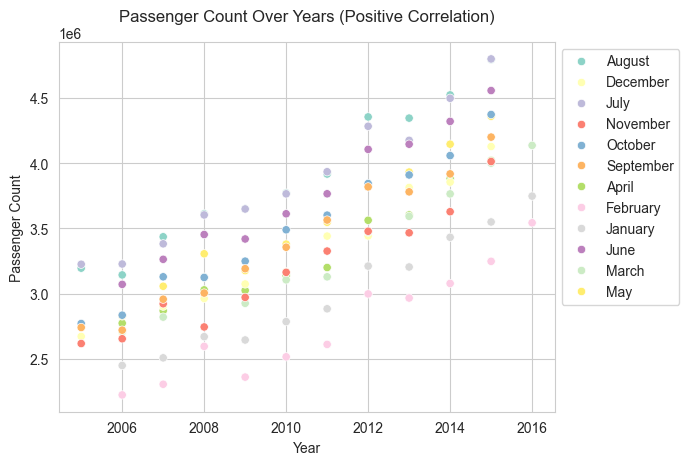

In [41]:
plt.title('Passenger Count Over Years (Positive Correlation)',pad=15)
sns.scatterplot(data=df.groupby(by=['Year','Month']).agg({'Passenger_Count':'sum'}),y='Passenger_Count',x='Year',hue='Month',palette='Set3')
plt.legend(bbox_to_anchor=(1,1))
plt.ylabel('Passenger Count')

In [42]:
month_dict = {
   'January': 0,
   'February': 1,
   'March': 2,
   'April': 3,
   'May': 4,
   'June': 5,
   'July': 6,
   'August': 7,
   'September': 8,
   'October': 10,
   'November': 11,
   'December': 12
}
def sort_by_month(x):
   return [month_dict[item] for item in x]

In [43]:
df.pivot_table(index='Year',columns='Month',values='Passenger_Count',aggfunc='sum').sort_index(axis=1,key=sort_by_month)

Month    January   February      March      April        May       June  \
Year                                                                      
2005         NaN        NaN        NaN        NaN        NaN        NaN   
2006   2448889.0  2223024.0  2708778.0  2773293.0  2829000.0  3071396.0   
2007   2507430.0  2304990.0  2820085.0  2869247.0  3056934.0  3263621.0   
2008   2670053.0  2595676.0  3127387.0  3029021.0  3305954.0  3453751.0   
2009   2644539.0  2359800.0  2925918.0  3024973.0  3177100.0  3419595.0   
2010   2785466.0  2515361.0  3105958.0  3139059.0  3380355.0  3612886.0   
2011   2883810.0  2610667.0  3129205.0  3200527.0  3547804.0  3766323.0   
2012   3211600.0  2998119.0  3472440.0  3563007.0  3820570.0  4107195.0   
2013   3204637.0  2966477.0  3593364.0  3604104.0  3933016.0  4146797.0   
2014   3432625.0  3078405.0  3765504.0  3881893.0  4147096.0  4321833.0   
2015   3550084.0  3248144.0  4001521.0  4021677.0  4361140.0  4558511.0   
2016   3748529.0  3543639.0  4137679.0        NaN        NaN        NaN   

Month       July     August  September    October   November   December  
Year                                                                     
2005   3225769.0  3195866.0  2740553.0  2770715.0  2617333.0  2671797.0  
2006   3227605.0  3143839.0  2720100.0  2834959.0  2653887.0  2698200.0  
2007   3382382.0  3436417.0  2957530.0  3129309.0  2922500.0  2903637.0  
2008   3603946.0  3612297.0  3004720.0  3124451.0  2744485.0  2962937.0  
2009   3649702.0  3650668.0  3191526.0  3249428.0  2971484.0  3074209.0  
2010   3765824.0  3771842.0  3356365.0  3490100.0  3163659.0  3167124.0  
2011   3935589.0  3917884.0  3564970.0  3602455.0  3326859.0  3441693.0  
2012   4284443.0  4356216.0  3819379.0  3844987.0  3478890.0  3443039.0  
2013   4176486.0  4347059.0  3781168.0  3910790.0  3466878.0  3814984.0  
2014   4499221.0  4524918.0  3919072.0  4059443.0  3628786.0  3855835.0  
2015   4801148.0  4796653.0  4201394.0  4374749.0  4013814.0  4129052.0  
2016         NaN        NaN        NaN        NaN        NaN        NaN

<Axes: title={'center': 'Passenger Count for Each Month Over Years'}, xlabel='Month', ylabel='Year'>

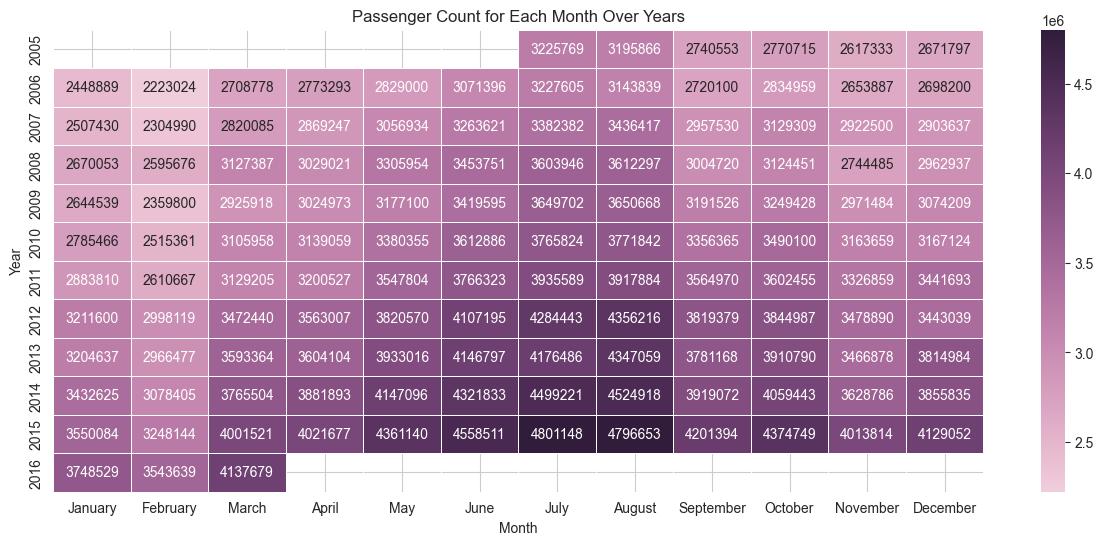

In [47]:
plt.figure(figsize=(15,6))
plt.title('Passenger Count for Each Month Over Years')
data=df.pivot_table(index='Year',columns='Month',values='Passenger_Count',aggfunc='sum').sort_index(axis=1,key=sort_by_month)
sns.heatmap(data=data,cmap=sequential_palette,annot=True,linewidths=0.5,fmt='.0f')


In [ ]:
df[df['Activity_Type_Code']=='Thru / Transit']

Activity_Period                 Operating_Airline  \
df_index                                                     
2                2005-07                      ATA Airlines   
15               2005-07                   Alaska Airlines   
20               2005-07                   Alaska Airlines   
95               2005-07  United Airlines - Pre 07/01/2013   
98               2005-07  United Airlines - Pre 07/01/2013   
...                  ...                               ...   
14860            2016-02                   United Airlines   
14965            2016-03                Southwest Airlines   
14978            2016-03                   United Airlines   
14981            2016-03                   United Airlines   
14984            2016-03                   United Airlines   

         Operating_Airline_IATA_Code                 Published_Airline  \
df_index                                                                 
2                                 TZ                      ATA Airlines   
15                                AS                   Alaska Airlines   
20                                AS                   Alaska Airlines   
95                                UA  United Airlines - Pre 07/01/2013   
98                                UA  United Airlines - Pre 07/01/2013   
...                              ...                               ...   
14860                             UA                   United Airlines   
14965                             WN                Southwest Airlines   
14978                             UA                   United Airlines   
14981                             UA                   United Airlines   
14984                             UA                   United Airlines   

         Published_Airline_IATA_Code    GEO_Summary GEO_Region  \
df_index                                                         
2                                 TZ       Domestic         US   
15                                AS       Domestic         US   
20                                AS  International     Mexico   
95                                UA       Domestic         US   
98                                UA  International       Asia   
...                              ...            ...        ...   
14860                             UA       Domestic         US   
14965                             WN       Domestic         US   
14978                             UA       Domestic         US   
14981                             UA       Domestic         US   
14984                             UA       Domestic         US   

         Activity_Type_Code Price_Category_Code       Terminal Boarding_Area  \
df_index                                                                       
2            Thru / Transit            Low Fare     Terminal 1             B   
15           Thru / Transit               Other  International             A   
20           Thru / Transit               Other  International             A   
95           Thru / Transit               Other     Terminal 3             F   
98           Thru / Transit               Other  International             G   
...                     ...                 ...            ...           ...   
14860        Thru / Transit               Other     Terminal 3             F   
14965        Thru / Transit            Low Fare     Terminal 1             B   
14978        Thru / Transit               Other  International             G   
14981        Thru / Transit               Other     Terminal 3             E   
14984        Thru / Transit               Other     Terminal 3             F   

          Passenger_Count Adjusted_Activity_Type_Code  \
df_index                                                
2                    5415          Thru / Transit * 2   
15                   3678          Thru / Transit * 2   
20                   2266          Thru / Transit * 2   
95                  11388          Thru / Transit * 2 

In [ ]:
total_pssngr_over_y=df.pivot_table(index='Year',columns='Operating_Airline',values='Passenger_Count',aggfunc='sum')
# total_pssngr_over_y=total_pssngr_over_y.convert_dtypes().replace({'<Nan>':'NaN'})
total_pssngr_over_y.shape

(12, 77)

Text(195.72222222222223, 0.5, 'Year')

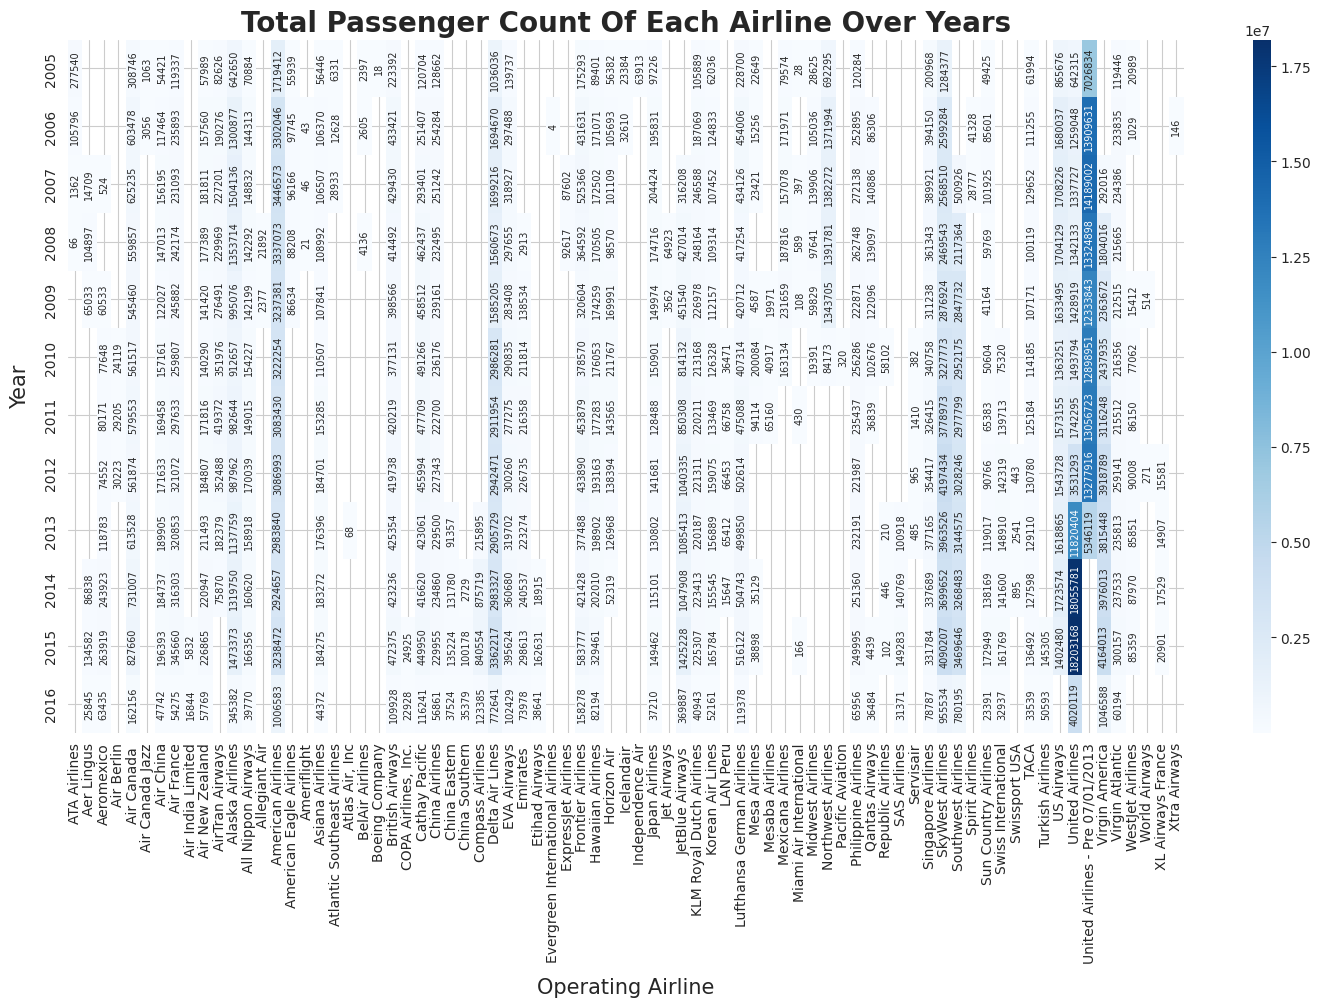

In [ ]:
plt.figure(figsize=(18,9))
plt.title('Total Passenger Count Of Each Airline Over Years',fontdict={'size':20,'fontweight':'bold'})
sns.heatmap(data=total_pssngr_over_y,cmap='Blues',annot=True,fmt='.0f',annot_kws={"size":'x-small',"rotation":90},cbar_kws={'aspect':40})
plt.xlabel('Operating Airline',fontdict={'size':15},labelpad=10)
plt.ylabel('Year',fontdict={'size':15},labelpad=10)

In [ ]:
average_pssng_month_y=df.pivot_table(index='Operating_Airline',columns='Month',values='Passenger_Count',aggfunc='mean')
average_pssng_month_y

Month                     April        August      December      February  \
Operating_Airline                                                           
ATA Airlines        8743.000000  14980.000000  11521.666667   5858.000000   
Aer Lingus          4127.375000   5962.875000   3677.750000   2645.000000   
Aeromexico          5208.071429   5667.000000   6912.857143   4872.250000   
Air Berlin                  NaN   3039.000000           NaN           NaN   
Air Canada         15279.464286  26406.218750  15404.800000  13674.966667   
...                         ...           ...           ...           ...   
Virgin Atlantic     9873.400000  11519.181818   8719.590909   6954.863636   
WestJet Airlines     616.833333   6691.750000   1182.500000      2.000000   
World Airways               NaN           NaN           NaN           NaN   
XL Airways France           NaN   3051.125000           NaN           NaN   
Xtra Airways                NaN     73.000000           NaN           NaN   

Month                   January          July          June         March  \
Operating_Airline                                                           
ATA Airlines        5729.600000  12416.400000    158.000000   9124.666667   
Aer Lingus          3273.750000   5728.500000   5737.250000   4288.875000   
Aeromexico          6864.857143   5866.062500   5432.142857   4990.333333   
Air Berlin                  NaN   2787.333333   2580.000000           NaN   
Air Canada         13884.166667  25897.687500  21157.300000  16061.533333   
...                         ...           ...           ...           ...   
Virgin Atlantic     8522.500000  11364.818182  11289.200000   9275.090909   
WestJet Airlines     514.500000   6607.687500   6232.214286           NaN   
World Airways               NaN    257.000000           NaN           NaN   
XL Airways France           NaN   2862.375000   2084.666667           NaN   
Xtra Airways                NaN           NaN           NaN           NaN   

Month                       May      November       October     September  
Operating_Airline                                                          
ATA Airlines         190.000000   6299.166667   8730.800000  10179.250000  
Aer Lingus          4775.375000   3770.500000   3763.000000   5297.000000  
Aeromexico          5055.785714   5402.428571   5458.071429   4156.125000  
Air Berlin          1551.833333           NaN   1409.833333   2556.500000  
Air Canada         17848.066667  13953.800000  17849.906250  20243.281250  
...                         ...           ...           ...           ...  
Virgin Atlantic    10741.300000   8092.454545  10607.727273  11419.909091  
WestJet Airlines    6546.000000   1275.500000   4472.312500   5626.937500  
World Airways               NaN    271.000000           NaN           NaN  
XL Airways France    409.750000           NaN           NaN    604.500000  
Xtra Airways                NaN           NaN           NaN           NaN  

[77 rows x 12 columns]

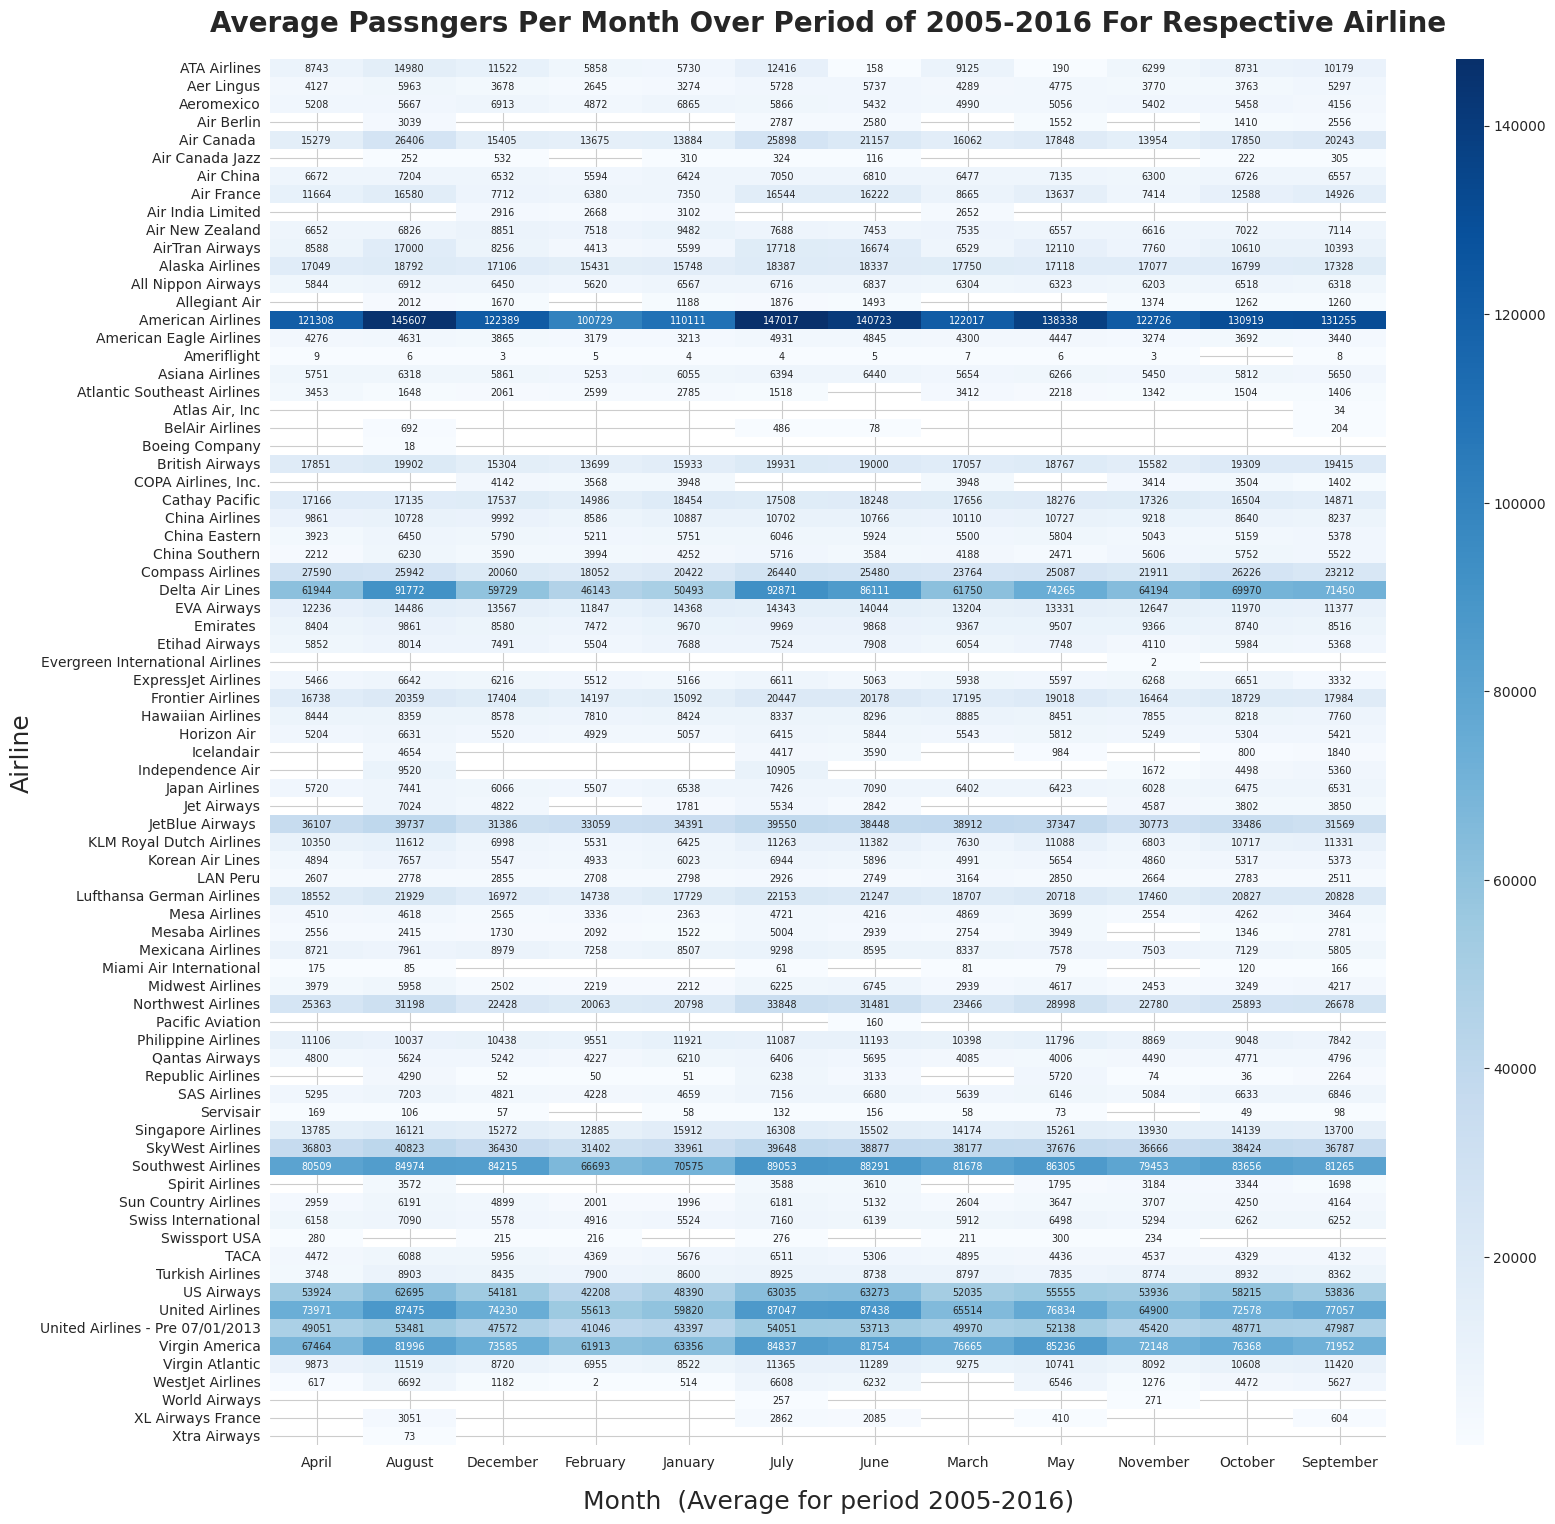

In [ ]:
plt.figure(figsize=(18,18))
plt.title('Average Passngers Per Month Over Period of 2005-2016 For Respective Airline',fontdict={'size':20,'fontweight':'bold'},pad=20)
sns.heatmap(data=average_pssng_month_y,cmap='Blues',fmt='.0f',annot=True,annot_kws={'size':'x-small'},cbar_kws={'aspect':50})
plt.xlabel('Month  (Average for period 2005-2016)',fontdict={'size':18},labelpad=15)
plt.ylabel('Airline',fontdict={'size':18})
plt.show()

In [ ]:
print(total_pssngr_over_y.columns==average_pssng_month_y.index)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True]


<Axes: ylabel='Passenger_Count'>

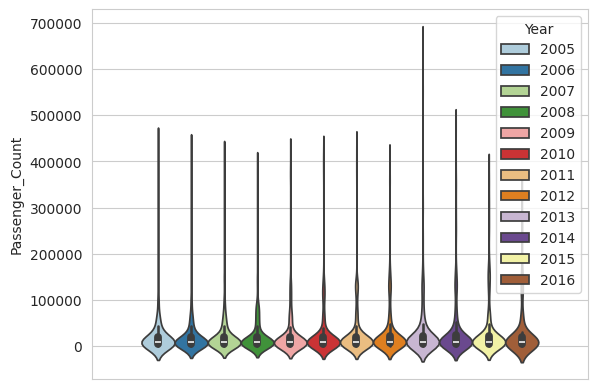

In [ ]:
sns.violinplot(data=df,y='Passenger_Count',hue='Year',palette='Paired')

In [ ]:
df

Activity_Period Operating_Airline Operating_Airline_IATA_Code  \
df_index                                                                 
0                2005-07      ATA Airlines                          TZ   
1                2005-07      ATA Airlines                          TZ   
2                2005-07      ATA Airlines                          TZ   
3                2005-07       Air Canada                           AC   
4                2005-07       Air Canada                           AC   
...                  ...               ...                         ...   
15002            2016-03    Virgin America                          VX   
15003            2016-03    Virgin America                          VX   
15004            2016-03    Virgin America                          VX   
15005            2016-03   Virgin Atlantic                          VS   
15006            2016-03   Virgin Atlantic                          VS   

         Published_Airline Published_Airline_IATA_Code    GEO_Summary  \
df_index                                                                
0             ATA Airlines                          TZ       Domestic   
1             ATA Airlines                          TZ       Domestic   
2             ATA Airlines                          TZ       Domestic   
3              Air Canada                           AC  International   
4              Air Canada                           AC  International   
...                    ...                         ...            ...   
15002       Virgin America                          VX       Domestic   
15003       Virgin America                          VX  International   
15004       Virgin America                          VX  International   
15005      Virgin Atlantic                          VS  International   
15006      Virgin Atlantic                          VS  International   

         GEO_Region Activity_Type_Code Price_Category_Code       Terminal  \
df_index                                                                    
0                US           Deplaned            Low Fare     Terminal 1   
1                US           Enplaned            Low Fare     Terminal 1   
2                US     Thru / Transit            Low Fare     Terminal 1   
3            Canada           Deplaned               Other     Terminal 1   
4            Canada           Enplaned               Other     Terminal 1   
...             ...                ...                 ...            ...   
15002            US           Enplaned            Low Fare     Terminal 2   
15003        Mexico           Deplaned            Low Fare  International   
15004        Mexico           Enplaned            Low Fare     Terminal 2   
15005        Europe           Deplaned               Other  International   
15006        Europe           Enplaned               Other  International   

         Boarding_Area  Passenger_Count Adjusted_Activity_Type_Code  \
df_index                                                              
0                    B            27271                    Deplaned   
1                    B            29131                    Enplaned   
2                    B             5415          Thru / Transit * 2   
3                    B            35156                    Deplaned   
4                    B            34090                    Enplaned   
...                ...              ...                         ...   
15002                D           194636                    Enplaned   
15003                A             4189                    Deplaned   
15004                D             4693                    Enplaned   
15005                A            12313                    Deplaned   
15006                A            10898                    Enplaned   

          Adjusted_Passenger_Count  Year  Month Collaborated  
df_index                                                      
0                            27271  2005   J

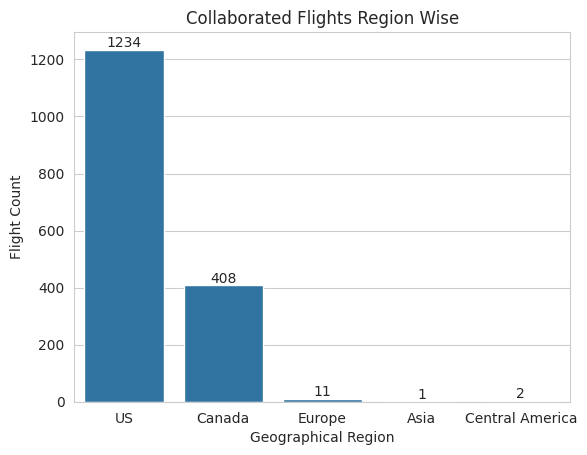

In [ ]:
plt.title('Collaborated Flights Region Wise')
bars=sns.countplot(data=df[df['Collaborated']=='Yes'],x='GEO_Region')
plt.bar_label(bars.containers[-1],fmt='%.0f',label_type='edge')
plt.xlabel('Geographical Region')
plt.ylabel('Flight Count')
plt.show()

In [ ]:
airline_collaborations=df[df['Collaborated']=='Yes'].pivot_table(index='Operating_Airline',columns='Published_Airline',values='Collaborated',aggfunc='count',fill_value=0)

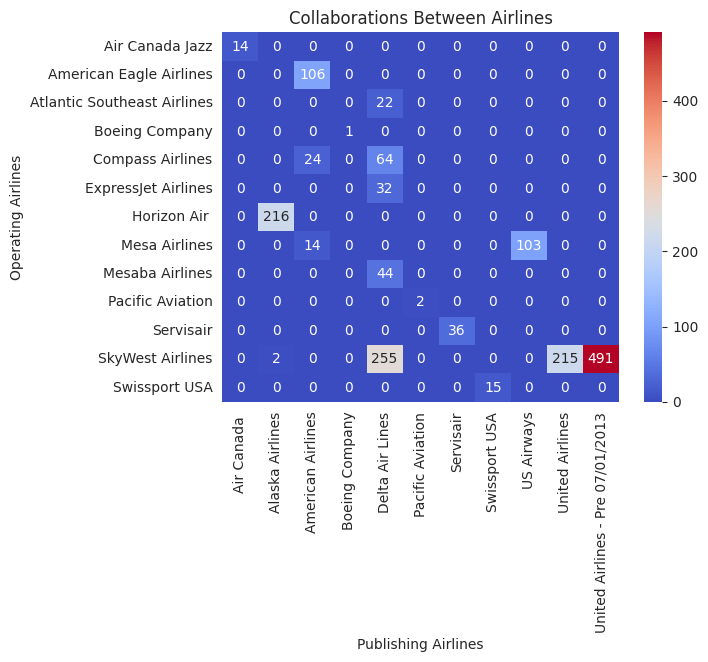

In [ ]:
sns.heatmap(data=airline_collaborations,cmap='coolwarm',annot=True,fmt='d')
plt.title('Collaborations Between Airlines')
plt.ylabel('Operating Airlines')
plt.xlabel('Publishing Airlines')
plt.show()